# Business Understanding

- A house price could be predicted from the historical data of another houses
- Price is continuous, therefore I will need algorithms that could solve a regression task
- The algorithm that I will try to use is linear regression & decision tree

# Setup

In [4]:
# import useful library, module, class, function, etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree, export_text

# Data Understanding

In [5]:
# load dataset (csv) into pandas dataframe
df = pd.read_csv("/content/kc_house_data.csv")

In [6]:
# show the high-level information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

> The only variable with a non-numeric data type based on the info above is `date`, it is stored as an object. I assume this variable is referring to the time a data is collected. I'm going to overlook this variable since I don't think it can be use to predict `price`.

In [7]:
# show the sample of data in the dataframe
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1027,2224700136,20150122T000000,315000.0,4,1.0,1300,8400,1.5,0,0,...,7,1300,0,1953,0,98133,47.7612,-122.332,1330,8400
20734,255550070,20140626T000000,330675.0,4,3.0,1930,3031,1.0,0,0,...,7,1200,730,2006,0,98019,47.7457,-121.985,1930,2611
4150,2235000015,20140804T000000,260600.0,2,1.0,810,4560,1.0,0,0,...,7,810,0,1928,0,98126,47.5425,-122.376,1490,4560


In [8]:
# display the descriptive statistics of all numerical data (1)
# since there are lots of columns, the display will be seperated
df.describe().iloc[:, :10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000


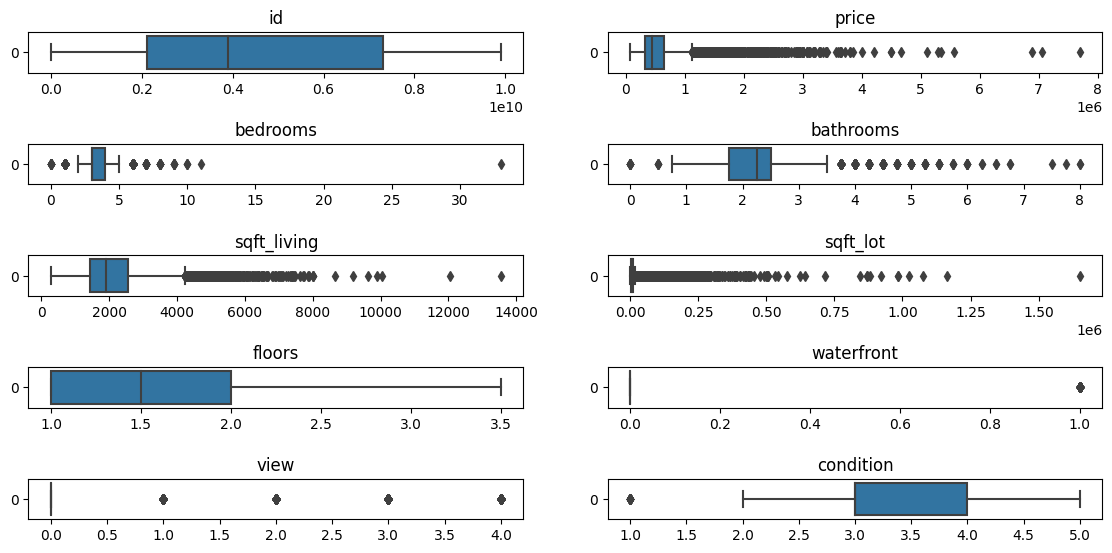

In [9]:
# create multiple box-whisker plot
n_row = 5
n_col = 2
to_be_plotted = df.describe().iloc[:, :10].columns

fig, axs = plt.subplots(n_row, n_col, figsize=(12,6))
fig.tight_layout(pad=3)

counter = 0
for i in range(n_row):
  for j in range(n_col):
    sns.boxplot(data=df[to_be_plotted[counter]], orient='h', ax=axs[i, j])
    axs[i, j].set_title(to_be_plotted[counter])
    counter += 1

plt.show()

In [10]:
# display the descriptive statistics of all numerical data (2)
# since there are lots of columns, the display will be seperated
df.describe().iloc[:, 10:21]

,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


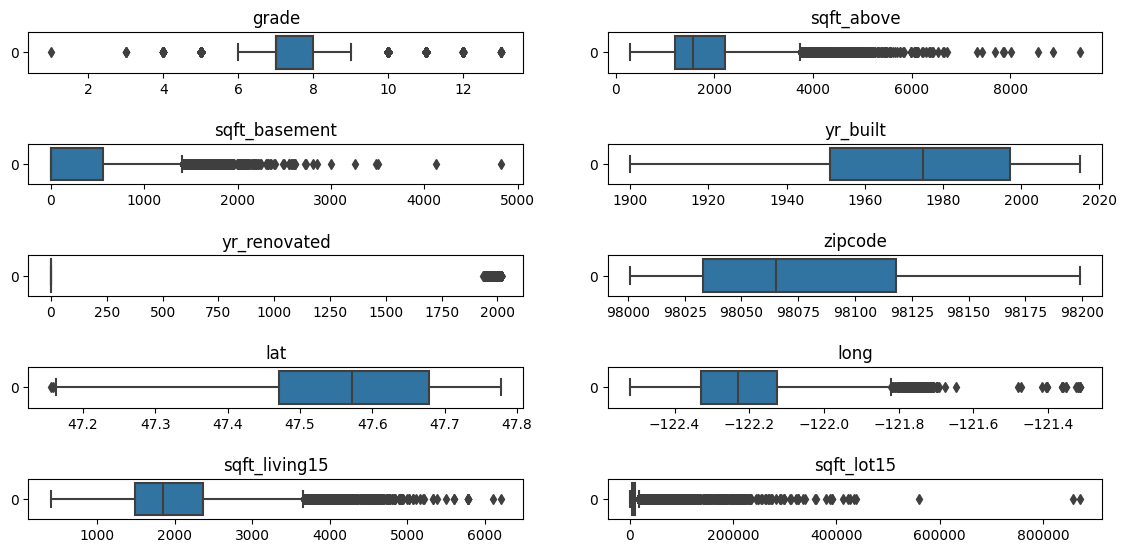

In [11]:
# create multiple box-whisker plot
n_row = 5
n_col = 2
to_be_plotted = df.describe().iloc[:, 10:21].columns

fig, axs = plt.subplots(n_row, n_col, figsize=(12,6))
fig.tight_layout(pad=3)

counter = 0
for i in range(n_row):
  for j in range(n_col):
    sns.boxplot(data=df[to_be_plotted[counter]], orient='h', ax=axs[i, j])
    axs[i, j].set_title(to_be_plotted[counter])
    counter += 1

plt.show()

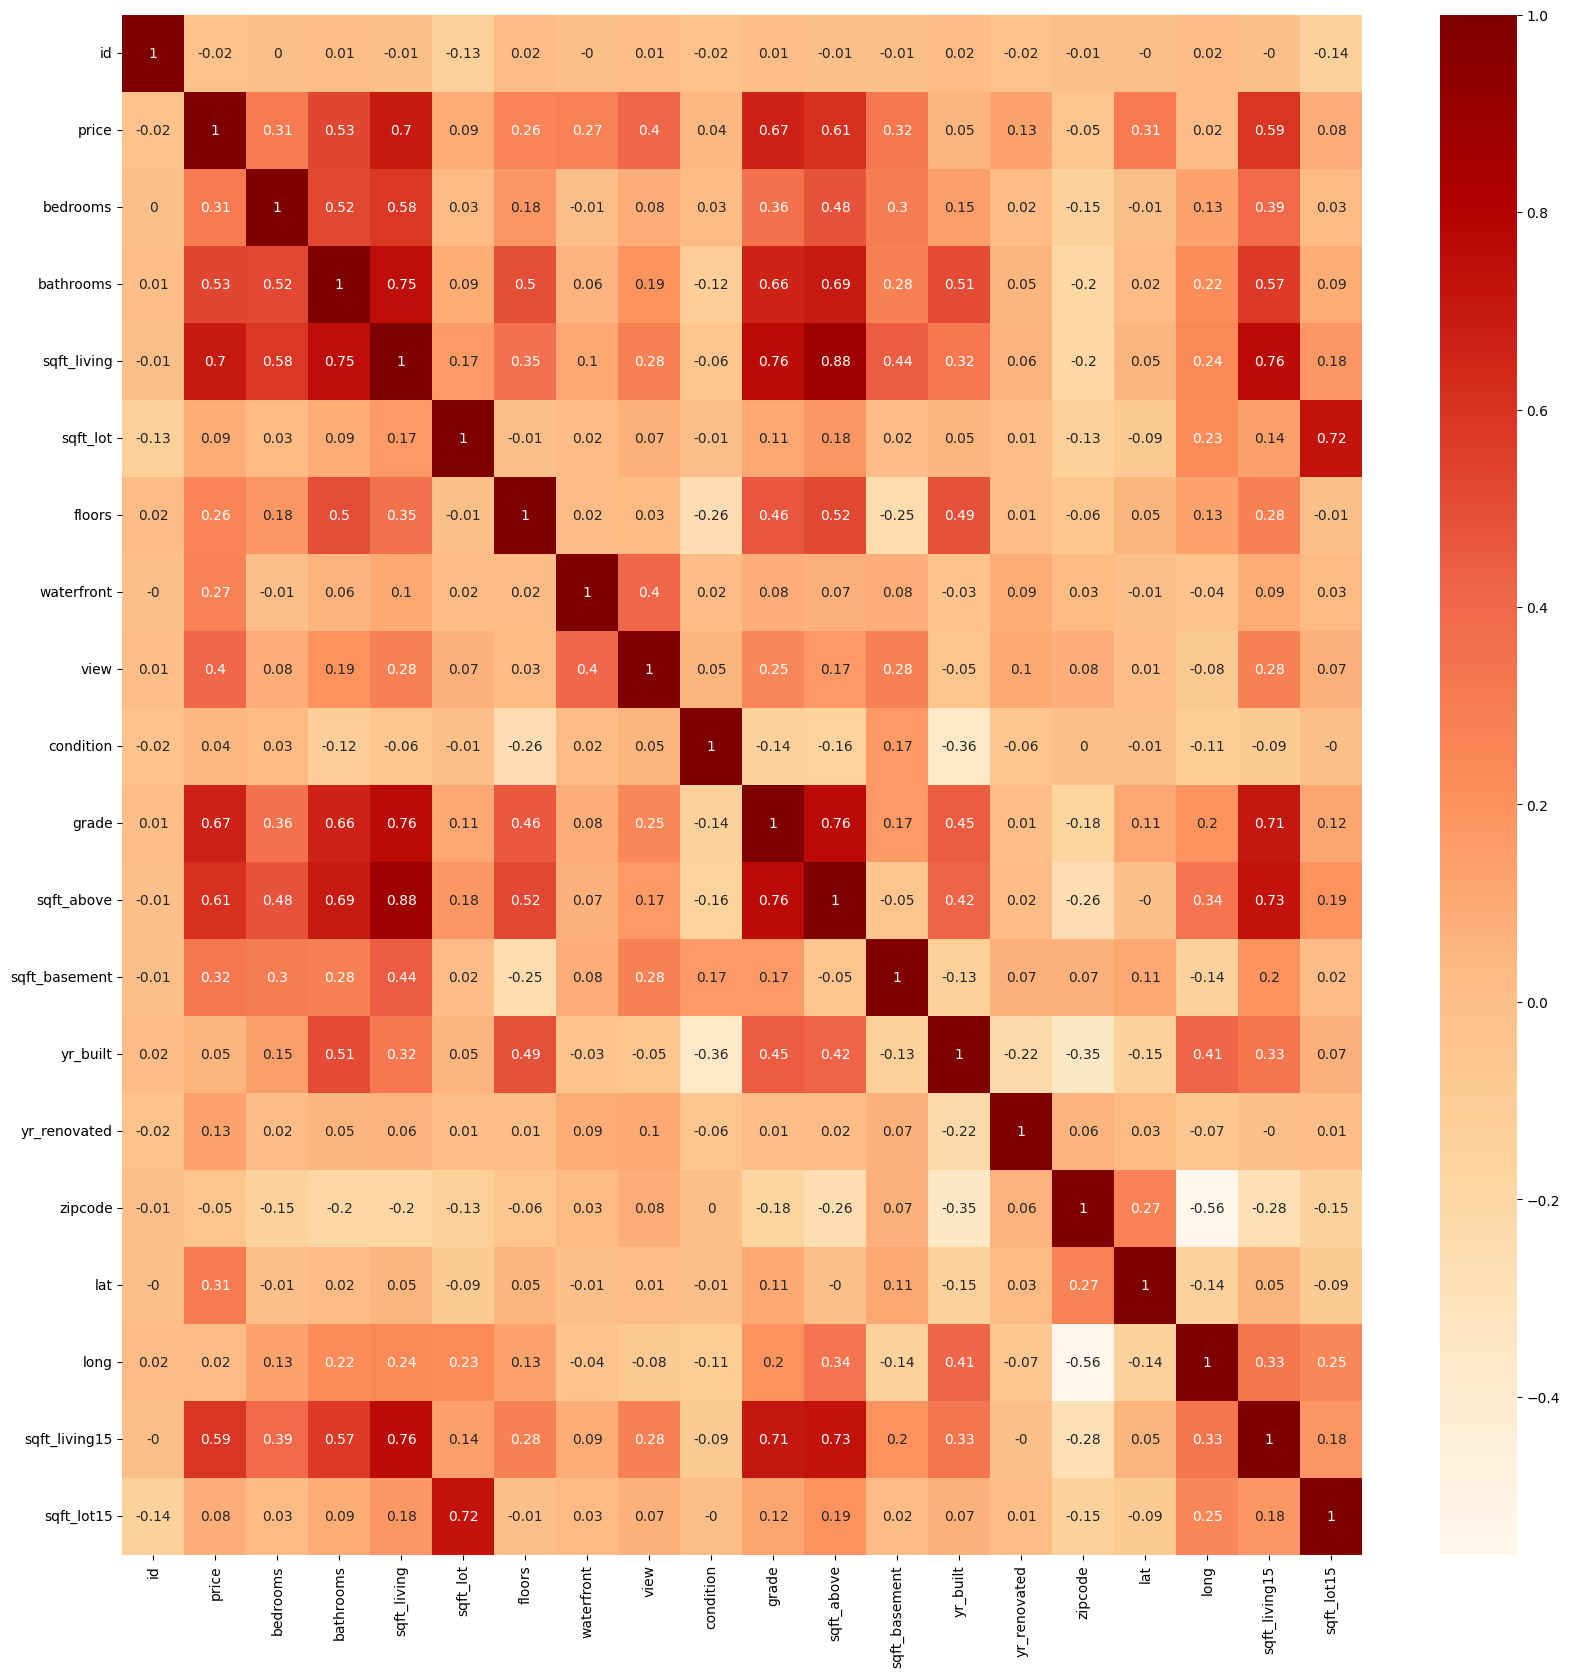

In [12]:
# correlation matrix for all numerical variables
plt.figure(figsize=(20,20))
compute_correlation_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(compute_correlation_matrix, annot=True, cmap='OrRd')
plt.show()

# Data Preparation

## Cleaning

Based on the high-level information of this dataset, all "non-null count" values are equal to the number of entries. It means that this dataset does not contain any missing value.

The data visualization in the previous stage indicates a lot of columns in this dataset contain outlier. I will further check on this matter.

In [13]:
def outlier_percentage(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  RLB = Q1 - 1.5 * IQR
  RUB = Q3 + 1.5 * IQR
  return ((dataframe < RLB) | (dataframe > RUB)).sum()/dataframe.count()*100

In [14]:
# counting the percentage of outlier in each column
outlier_percentage(df.select_dtypes(include='number'))

id                0.000000
price             5.302364
bedrooms          2.526257
bathrooms         2.641928
sqft_living       2.646555
sqft_lot         11.220099
floors            0.000000
waterfront        0.754176
view              9.827419
condition         0.138805
grade             8.841901
sqft_above        2.827002
sqft_basement     2.294915
yr_built          0.000000
yr_renovated      4.228936
zipcode           0.000000
lat               0.009254
long              1.184472
sqft_living15     2.517004
sqft_lot15       10.151298
dtype: float64

> I assume that if the outlier that present on a column is >=1%, it is indeed a real value recorded and is not an error from observation. Therefore, I don't have to remove those outliers.

> `waterfront` & `condition` has <1% outlier. I won't handle waterfront, based on the data understanding stage, it contains boolean datatypes so none of the data should actually be considered as outlier.

> Therefore I will only handle `condition`.

In [15]:
def remove_outlier(dataframe, col_name):
  Q1 = dataframe[col_name].quantile(0.25)
  Q3 = dataframe[col_name].quantile(0.75)
  IQR = Q3 - Q1
  RLB = Q1 - 1.5 * IQR
  RUB = Q3 + 1.5 * IQR
  new_dataframe = dataframe.loc[~((dataframe[col_name] < RLB) | (dataframe[col_name] > RUB))]
  return new_dataframe

In [16]:
# creating new dataframe by selecting row WITHOUT outlier
df_clean = remove_outlier(df, "condition")

In [17]:
print("Number of row(s) after handling some outliers:", len(df_clean))

Number of row(s) after handling some outliers: 21583


In [18]:
# check whether there are duplicated row in the dataframe
df_clean.duplicated().sum()

0

> Up until here the dataset has been cleansed. The size of row has been reduced from 21.613 to 21.583

## Standardization

Numerical variables that was measured with different scales can cause bias when further processed in modelling stage. Therefore, it is better to standardize (scaled) those number. The technique that I will use is RobustScaler from SKLearn because this dataset contains some outlier. Further reading: https://scikit-learn.org/stable/modules/preprocessing.html#scaling-data-with-outliers

I won't scaled the target variables as it is not necessary. Scaling the target variable just make it harder to interpret the prediction.

In [19]:
numerical_data = df_clean.select_dtypes(include='number').drop("price", axis=1)
numerical_data.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df_robust_scaled = pd.DataFrame()
df_robust_scaled[numerical_data.columns] = RobustScaler().fit_transform(numerical_data)
display(df_robust_scaled)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.621783,0.0,-1.666667,-0.651786,-0.348528,-0.5,0.0,0.0,0.0,0.0,-0.374384,0.000000,-0.444444,0.0,1.329412,-0.292400,-0.133005,-0.574713,-0.395582
1,0.483865,0.0,0.000000,0.589286,-0.066158,0.5,0.0,0.0,0.0,0.0,0.600985,0.714286,-0.533333,1991.0,0.705882,0.719903,-0.438424,-0.172414,0.003815
2,0.332950,-1.0,-1.666667,-1.017857,0.423022,-0.5,0.0,0.0,0.0,-1.0,-0.778325,0.000000,-0.933333,0.0,-0.435294,0.801448,-0.014778,1.011494,0.088755
3,-0.273390,1.0,1.000000,0.044643,-0.463817,-0.5,0.0,0.0,2.0,0.0,-0.502463,1.625000,-0.222222,0.0,0.835294,-0.246080,-0.802956,-0.551724,-0.526104
4,-0.376134,0.0,-0.333333,-0.205357,0.082476,-0.5,0.0,0.0,0.0,1.0,0.118227,0.000000,0.266667,0.0,0.105882,0.217129,0.911330,-0.045977,-0.023494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,-0.702301,0.0,0.333333,-0.339286,-1.150053,1.5,0.0,0.0,0.0,1.0,-0.029557,0.000000,0.755556,0.0,0.447059,0.615199,-0.571429,-0.356322,-1.227108
21579,0.519725,1.0,0.333333,0.357143,-0.319617,0.5,0.0,0.0,0.0,1.0,0.738916,0.000000,0.866667,0.0,0.952941,-0.294813,-0.650246,-0.011494,-0.084337
21580,-0.459267,-1.0,-2.000000,-0.794643,-1.111210,0.5,0.0,0.0,0.0,0.0,-0.532020,0.000000,0.755556,0.0,0.929412,0.109047,-0.339901,-0.942529,-1.127108
21581,-0.696841,0.0,0.333333,-0.276786,-0.927102,0.5,0.0,0.0,0.0,1.0,0.039409,0.000000,0.644444,0.0,-0.447059,-0.179976,0.793103,-0.494253,-1.271687


# Modeling

## Simple linear regression

### Feature selection
Select the feature variables (X) that will be used to predict the target variables (y)

In [21]:
feature = df_robust_scaled[['sqft_living']]
feature.head()

,sqft_living
0,-0.651786
1,0.589286
2,-1.017857
3,0.044643
4,-0.205357


> The feature is selected based on correlation matrix

### Model development

In [22]:
# selecting target (y) variable
target = df_clean[['price']]
target.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [23]:
# randomly split the feature & target data into train set & test set
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.2, random_state=42)

In [24]:
# construct the model
model_slr = LinearRegression()

In [25]:
# train the model
model_slr.fit(X_train, y_train)

LinearRegression()

In [26]:
# use the model to making the prediction for train set
train_pred = model_slr.predict(X_train)

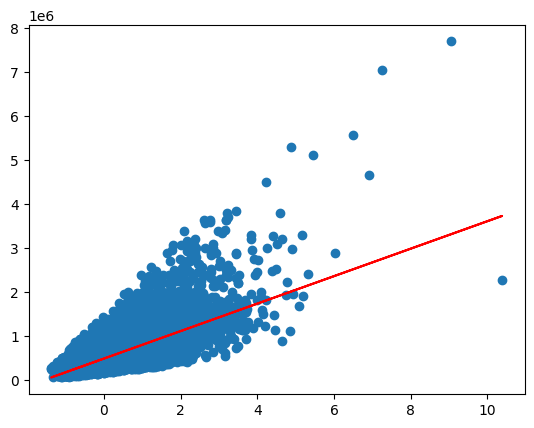

In [27]:
# visualize the regression function result, with respect to the data distribution
plt.scatter(X_train, y_train)
plt.plot(X_train, train_pred, c='red')
plt.show()

### Evaluation

In [28]:
# use the model to making the prediction for test set
test_pred = model_slr.predict(X_test)

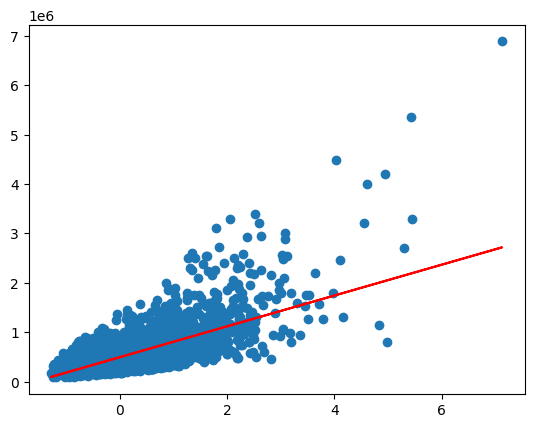

In [29]:
# visualize the regression function result, with respect to the data distribution
plt.scatter(X_test, y_test)
plt.plot(X_test, test_pred, c='red')
plt.show()

In [30]:
# modelling metrics: root mean squared error (RSME)
np.sqrt(mean_squared_error(y_true=y_test, y_pred=test_pred))

273186.97319117014

In [31]:
# modelling metrics: coefficient of determination (r-squared)
r2_score(y_true=y_test, y_pred=test_pred)

0.48658434407932527

In [32]:
# modelling metrics: mean absolute error (MAE)
mean_absolute_error(y_true=y_test, y_pred=test_pred)

178413.11981350498

> Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset. The **RMSE** tells how well the regression **model** **can predict** the value of the target variable in absolute terms. Meanwhile, **R- Squared** tells how well the **feature variables can explain** the variation in the target variable.
Further reading: https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

> On top of that, there is also **MAE**. MAE is interpreted as the average error when making a prediction with the model. RMSE on the other hand can be interpreted as the average weighted performance of the model, where a larger weight is added to outlier predictions. Further reading: https://stephenallwright.com/rmse-vs-mae/

## Multiple linear regression

### Feature selection
Select the feature variables (X) that will be used to predict the target variables (y)

In [33]:
feature = df_robust_scaled[['sqft_living', 'grade', 'sqft_above']]
feature.head()

,sqft_living,grade,sqft_above
0,-0.651786,0.0,-0.374384
1,0.589286,0.0,0.600985
2,-1.017857,-1.0,-0.778325
3,0.044643,0.0,-0.502463
4,-0.205357,1.0,0.118227


> The features are selected based on correlation matrix

### Model development

In [34]:
# selecting target (y) variable
target = df_clean[['price']]
target.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [35]:
# randomly split the feature & target data into train set & test set
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.2, random_state=42)

In [36]:
# construct the model
model_mlr = LinearRegression()

In [37]:
# train the model
model_mlr.fit(X_train, y_train)

LinearRegression()

### Evaluation

In [38]:
# use the model to making the prediction for test set
test_pred = model_mlr.predict(X_test)

In [39]:
# modelling metrics: root mean squared error (RSME)
np.sqrt(mean_squared_error(y_true=y_test, y_pred=test_pred))

261999.4108156747

In [40]:
# modelling metrics: coefficient of determination (r-squared)
r2_score(y_true=y_test, y_pred=test_pred)

0.5277741419283178

In [41]:
# modelling metrics: mean absolute error (MAE)
mean_absolute_error(y_true=y_test, y_pred=test_pred)

166115.3144394242

> Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset. The **RMSE** tells how well the regression **model** **can predict** the value of the target variable in absolute terms. Meanwhile, **R- Squared** tells how well the **feature variables can explain** the variation in the target variable.
Further reading: https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

> On top of that, there is also **MAE**. MAE is interpreted as the average error when making a prediction with the model. RMSE on the other hand can be interpreted as the average weighted performance of the model, where a larger weight is added to outlier predictions. Further reading: https://stephenallwright.com/rmse-vs-mae/

## Decision tree

### Model development

In [42]:
# randomly split the feature & target data into train set & test set
X = df_robust_scaled
y = df_clean[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [43]:
# construct the model
model_dtr = DecisionTreeRegressor(random_state=42)

In [44]:
# train the model
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
print(export_text(model_dtr, feature_names=pd.Series(X.columns).array))

|--- grade <= 1.50
|   |--- lat <= -0.18
|   |   |--- sqft_living <= 0.03
|   |   |   |--- sqft_living <= -0.42
|   |   |   |   |--- long <= -0.73
|   |   |   |   |   |--- view <= 1.50
|   |   |   |   |   |   |--- lat <= -0.60
|   |   |   |   |   |   |   |--- long <= -1.06
|   |   |   |   |   |   |   |   |--- id <= -0.56
|   |   |   |   |   |   |   |   |   |--- long <= -1.11
|   |   |   |   |   |   |   |   |   |   |--- value: [430000.00]
|   |   |   |   |   |   |   |   |   |--- long >  -1.11
|   |   |   |   |   |   |   |   |   |   |--- value: [410000.00]
|   |   |   |   |   |   |   |   |--- id >  -0.56
|   |   |   |   |   |   |   |   |   |--- condition <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- sqft_lot <= 3.62
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- sqft_lot >  3.62
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- condition > 

### Evaluation

In [46]:
# use the model to making the prediction for test set
test_pred = model_dtr.predict(X_test)

In [47]:
# modelling metrics: root mean squared error (RSME)
np.sqrt(mean_squared_error(y_true=y_test, y_pred=test_pred))

186575.86720187654

In [48]:
# modelling metrics: coefficient of determination (r-squared)
r2_score(y_true=y_test, y_pred=test_pred)

0.7605250601490054

In [49]:
# modelling metrics: mean absolute error (MAE)
mean_absolute_error(y_true=y_test, y_pred=test_pred)

100133.21172110262

> Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset. The **RMSE** tells how well the regression **model** **can predict** the value of the target variable in absolute terms. Meanwhile, **R- Squared** tells how well the **feature variables can explain** the variation in the target variable.
Further reading: https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

> On top of that, there is also **MAE**. MAE is interpreted as the average error when making a prediction with the model. RMSE on the other hand can be interpreted as the average weighted performance of the model, where a larger weight is added to outlier predictions. Further reading: https://stephenallwright.com/rmse-vs-mae/

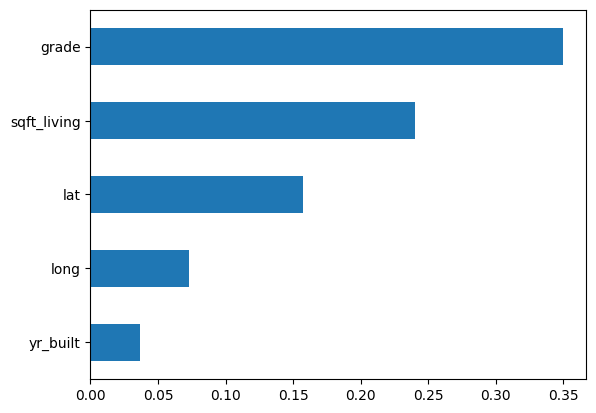

In [50]:
# checking feature importance (since we did not conduct a feature selection step)
feat_importances = pd.Series(model_dtr.feature_importances_, index=X.columns)
feat_importances.nlargest(5).sort_values(ascending=True).plot(kind='barh')
plt.show()

# Conclusion

1. I've build 3 models to predict price given a historical data of houses attributes (grade, house area, price, etc)
2. Model with the best performance is made with Decision Tree. Based on R-squared score, it got 0.76.